Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [1]:
library('tidymodels')
library('readr')
library('moderndive')


Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘readr’


The following object is masked from ‘package:yardstick’:

    spec


The following object is masked from ‘package:scales’:

    col_factor




We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [2]:
hate_crimes <- read_csv('http://bit.ly/2ItxYg3')

Rows: 51 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
hate_crimes %>% head(2)

state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
New Mexico,low,0.69,83,0.295,low,high,low,46686
Maine,low,0.54,90,0.616,low,low,low,51710


In [4]:
hate_crimes %>% str()

spc_tbl_ [51 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ state           : chr [1:51] "New Mexico" "Maine" "New York" "Illinois" ...
 $ median_house_inc: chr [1:51] "low" "low" "low" "low" ...
 $ share_pop_metro : num [1:51] 0.69 0.54 0.94 0.9 0.9 1 0.87 0.86 0.97 0.35 ...
 $ hs              : num [1:51] 83 90 85 86 87 85 89 90 81 91 ...
 $ hate_crimes     : num [1:51] 0.295 0.616 0.351 0.195 0.323 0.095 0.833 0.677 0.256 0.324 ...
 $ trump_support   : chr [1:51] "low" "low" "low" "low" ...
 $ unemployment    : chr [1:51] "high" "low" "low" "high" ...
 $ urbanization    : chr [1:51] "low" "low" "high" "high" ...
 $ income          : num [1:51] 46686 51710 54310 54916 57522 ...
 - attr(*, "spec")=
  .. cols(
  ..   state = col_character(),
  ..   median_house_inc = col_character(),
  ..   share_pop_metro = col_double(),
  ..   hs = col_double(),
  ..   hate_crimes = col_double(),
  ..   trump_support = col_character(),
  ..   unemployment = col_character(),
  ..   urbanization = col

Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

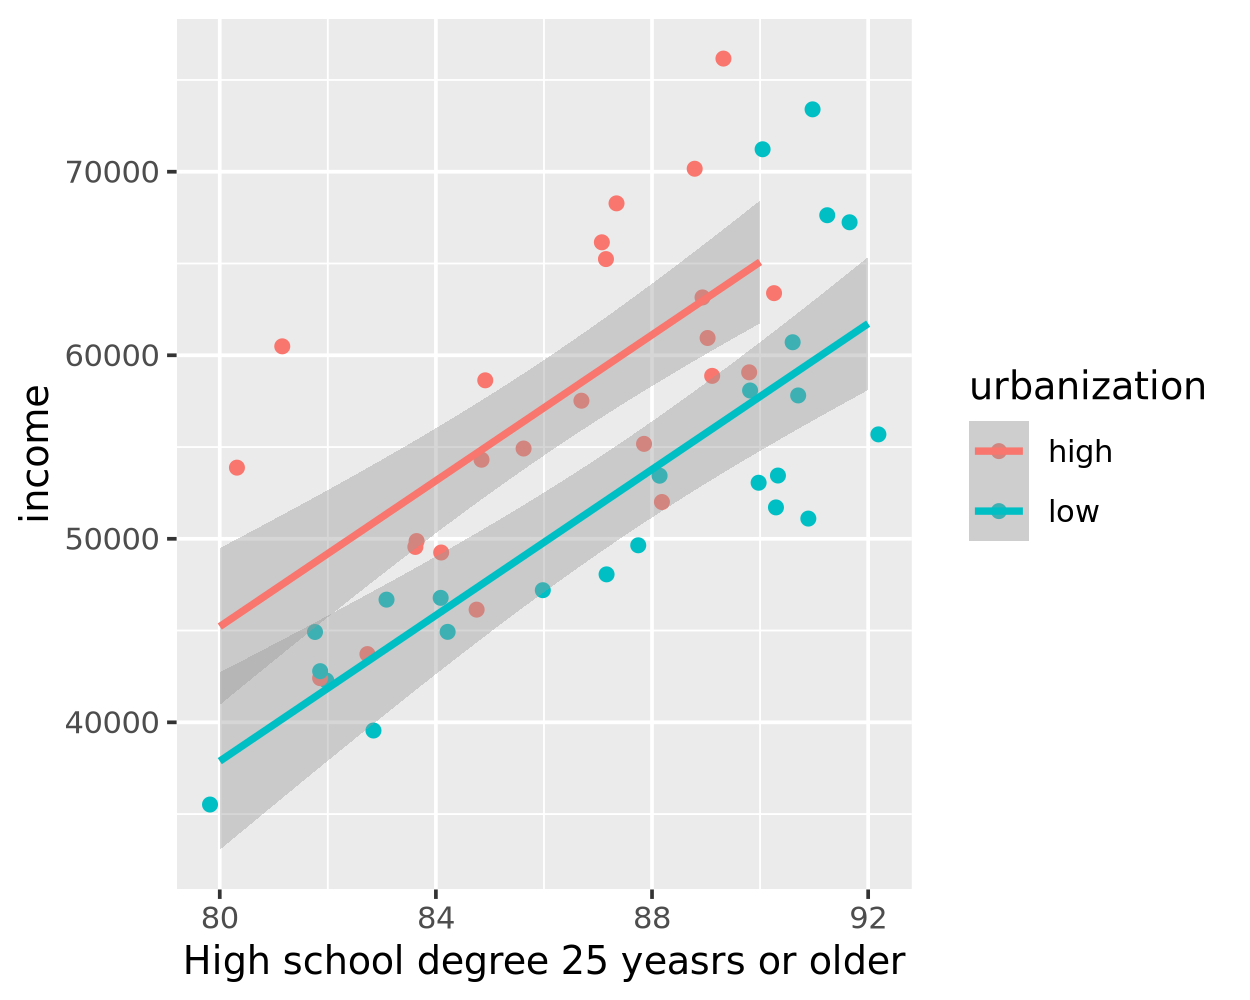

In [5]:
g <- hate_crimes %>%
            ggplot(aes( x= hs, y=income , color= urbanization))+
            geom_jitter(na.rm = T)+
            xlab("High school degree 25 yeasrs or older")+
            geom_parallel_slopes(na.rm = T)
g
            




❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**


## From the graph above, it seems the high urbanization has a larger intercept


Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”


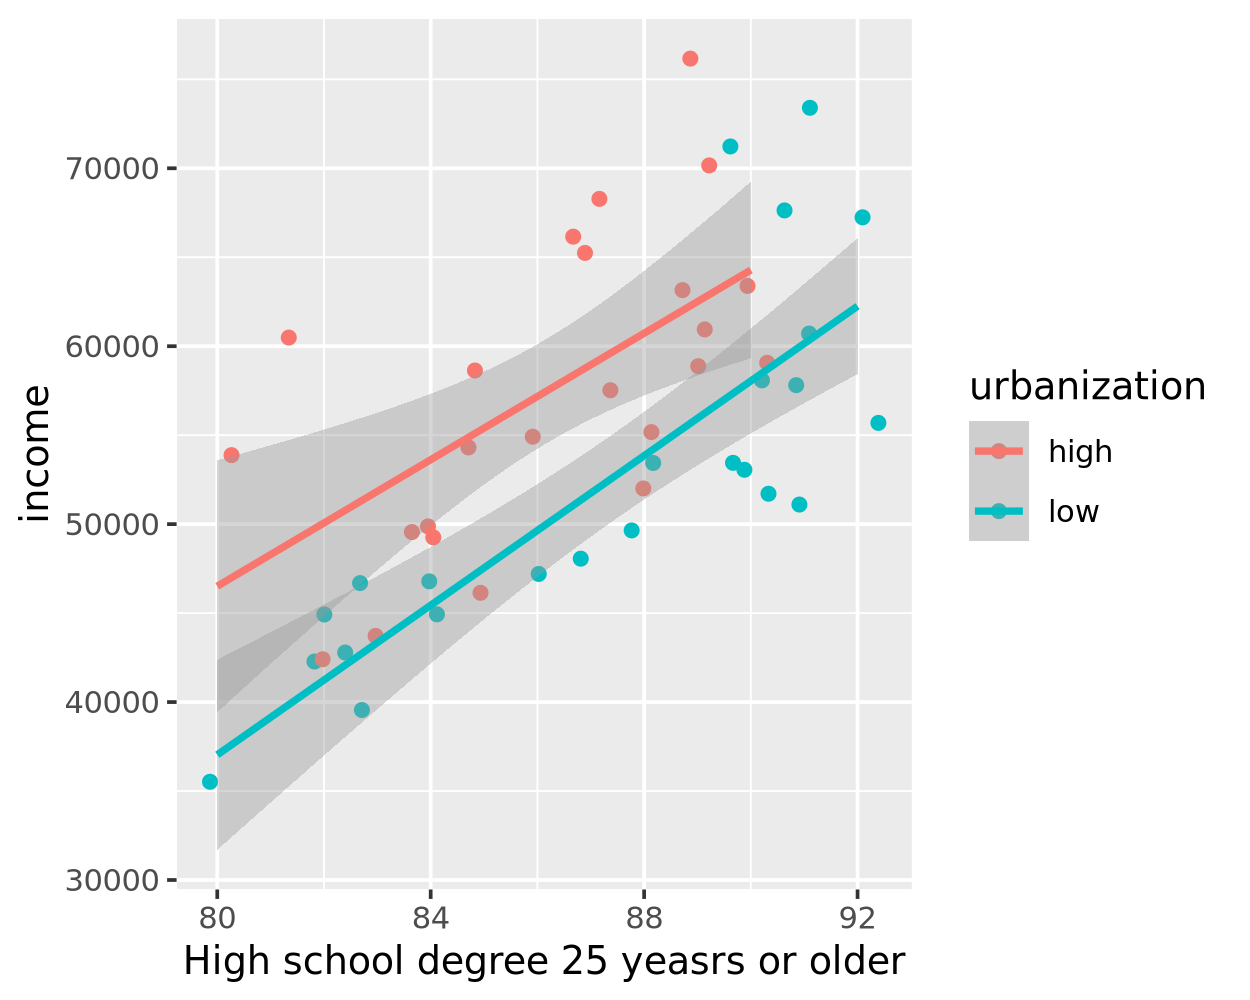

In [6]:
g2 <- hate_crimes %>%
            ggplot(aes( x= hs, y=income , color= urbanization))+
            geom_jitter(na.rm = T)+
            xlab("High school degree 25 yeasrs or older")+
            #geom_parallel_slopes(na.rm = T)
            geom_smooth(formula = 'y ~ x',method='lm')
g2
       



❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

## It seems the model with the interactions more reliable or a better fit for this problem 



Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [9]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [10]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod



parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [11]:
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
) %>% group_by(model) %>% summarize(r_squared = var(.pred) / var(income))
  


model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [12]:
glance(ps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


In [13]:
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance account for each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

## There is a bit difference between two models and their r squareds are differnt, also their intercepts and coefficients are differed.
### R squared for ps_mod is 0.5716112 vs R squared for nps_mod is 0.5746731 


❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [14]:
ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  



# income ~ hs + urbanization
### predicted income for  urbanization_high =  -113725 + 1987 * hs
### predicted income for  urbanization_low =  -113725 * 1987 * hs -7333 
### predicted income for  urbanization_high > predicted income for  urbanization_low



❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**


## As a result, according to the model prediction and coefficients the people who have the higher urbanization and higher education also have more income than people live in a low urbanization with lower education




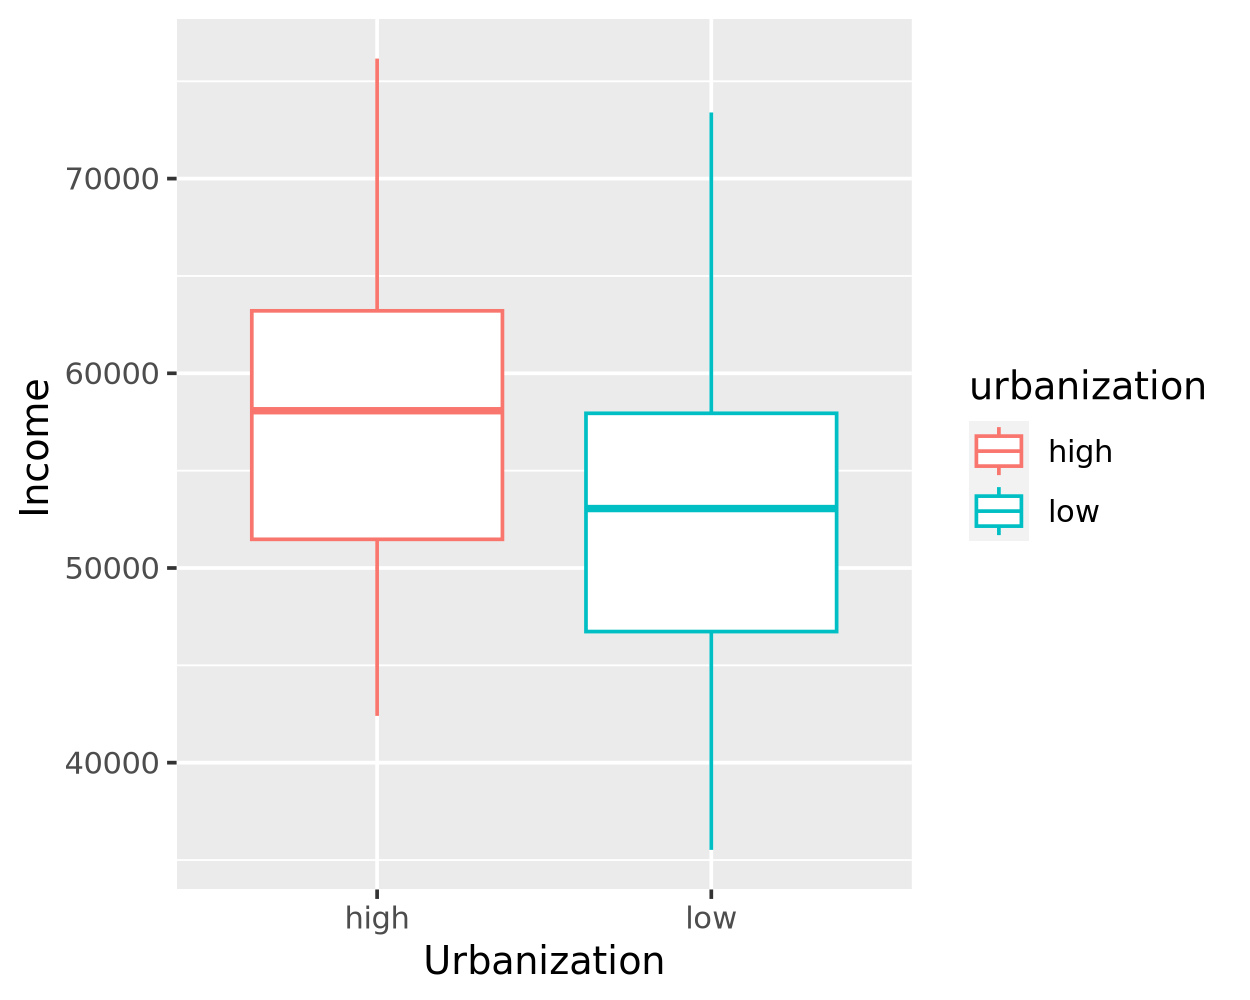

In [15]:
hate_crimes %>%            
            select (income, urbanization) %>%
            ggplot (aes(y=income,x=urbanization,color= urbanization))+ geom_boxplot()+
            ylab(" Income")+
            xlab("Urbanization")+
            labs('Income and Urbanization')


In [16]:
mod= lm( income ~ hs + urbanization,data = hate_crimes %>% drop_na())

In [17]:
income_pred = predict(mod,new_data=hate_crimes %>% select(income,urbanization))

In [18]:
new_data = hate_crimes %>% drop_na() %>% select(income,urbanization) %>% mutate(income_predictions=income_pred)

In [19]:
g1 <- new_data %>%            
            select (income, urbanization) %>%
            ggplot (aes(y=income,x=urbanization,color= urbanization))+ geom_boxplot()+
            
            ylab(" Income")+
            xlab("Urbanization")


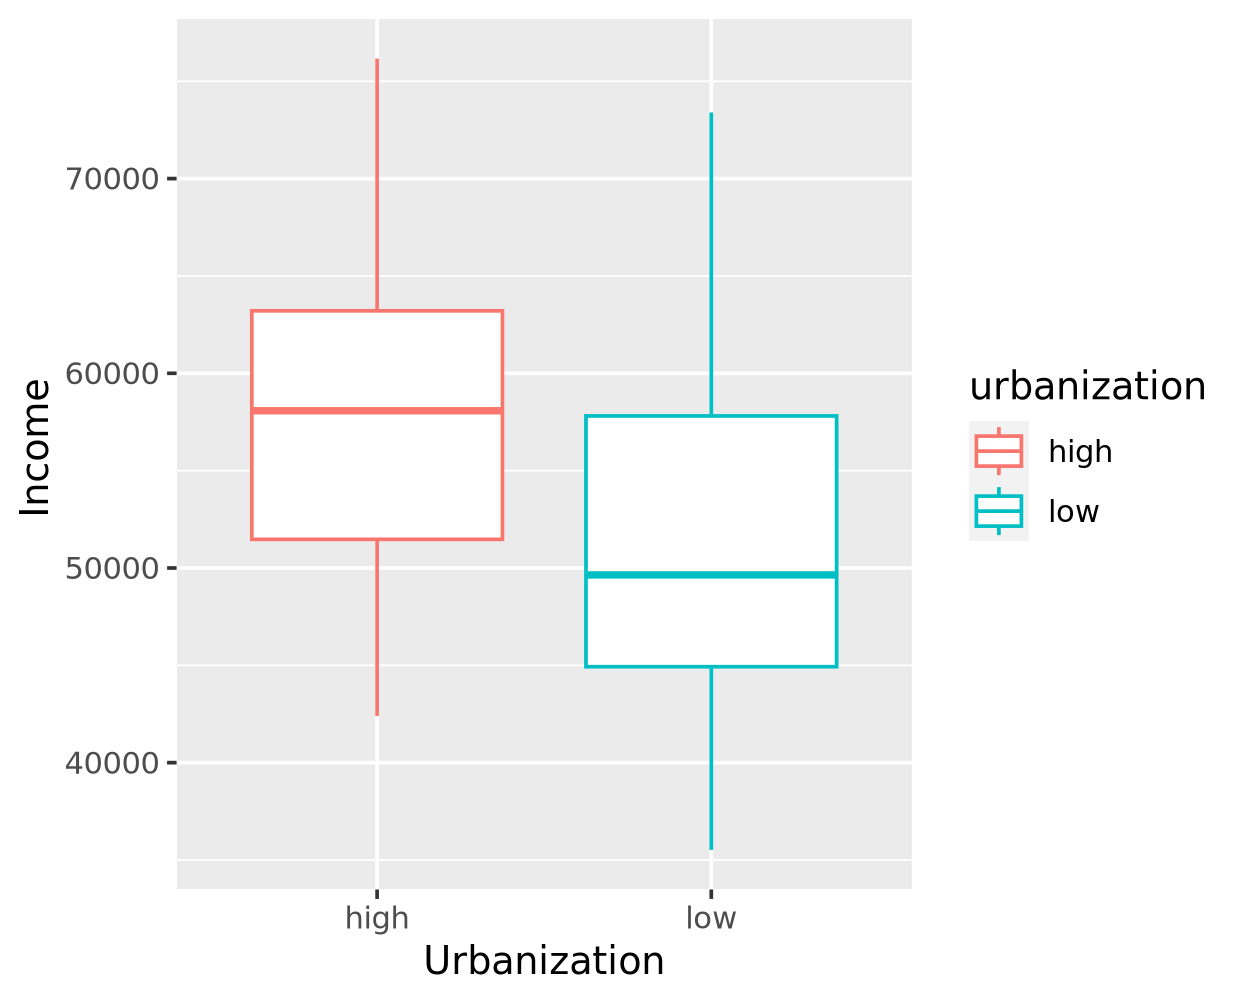

In [20]:
g1

In [21]:
g2 <- new_data %>%            
            select (income_predictions, urbanization) %>%
            ggplot (aes(y=income_predictions,x=urbanization,color= urbanization))+ geom_boxplot()+
            
            ylab("Income Predictions")+
            xlab("Urbanization")+
             labs('Predicted Income and Urbanization')

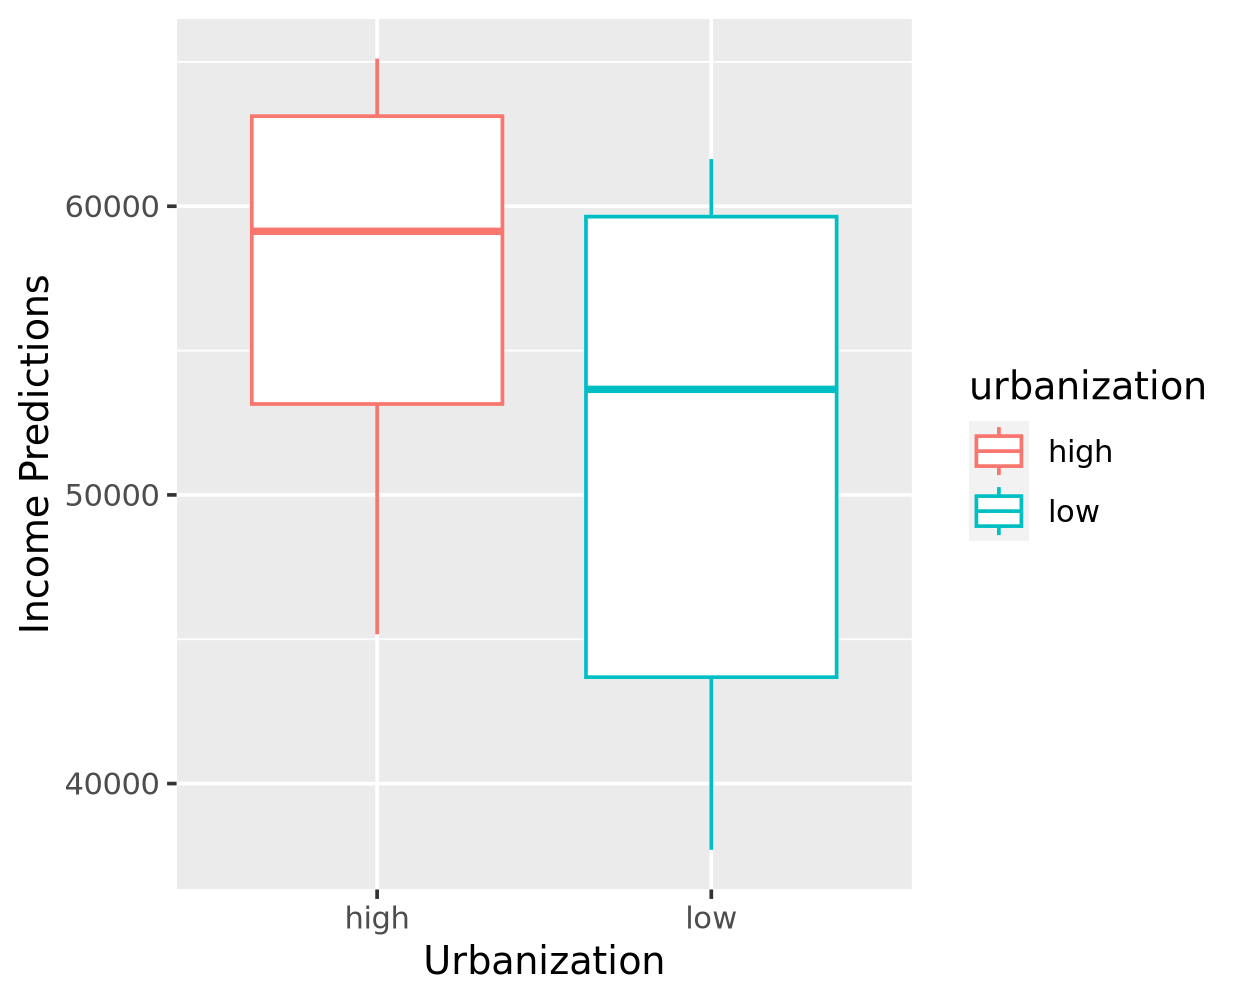

In [22]:
g2